# <div align="center"><b> Salvatore Ferragamo – A Bright Future </b></div>

--- 

Listed in the Milan Stock exchange, the Italian house **Salvatore Ferragamo** is the only luxury group relying on one unique brand. In recent years, the prestigious house has been going through a deep transformation in order to reinvent itself, impacting their data center, digital marketing, supply-chain, corporate strategy, and sustainable initiatives. Financial indicators are back to being positive in 2021. 

I strongly believe that Salvatore Ferragamo has great potential to reach new heights.

This research notebook will try to assess the true potential of Salvatore Ferragamo, compare it to other Italian luxury groups, model the financial risk, observe the marketing performance, provide a pricing strategy according to the Black Scholes for European options Call/Put with Greeks in Python, and C++.<p>


<div align="center"><b>- 1. Financial analysis – After the storm..</b></div><p>

<div align="center"><b>- 2. Marketing – Why is TikTok a mistake in luxury? </b></div><p>

<div align="center"><b>- 3. Option pricing – Black Scholes option pricing and Greeks </b></div><p>

<div align="center"><b>- 4. Conclusion</b></div><p>


### Risks – a true Global Vision

* The board of governance remains Italian at 98%. And the only non-Italian prominent figure was the English creative director Paul Andrew that left in March 2021. Therefore, the strategy is more or less euro-centric, if not Italian-italian. 
* The digital strategy isn’t harmonized on the global scale. The marketing team right away fell in the trap of TikTok as we will see in chapter 2. 
* The appointment of a new artistic director able to respect the heritage and create a fresh vision is a well-known conundrum in the luxury industry, and a hard one to solve. 


## <div align="center"><b>- 1. Financial analysis – After the storm..</b></div>
    
### Stable financial results

- Ferragamo results came back to pre-covid levels
- Revenues **`523.8`** (+44%), EBITDA **`144.3`** (+27.5%) in Euro MM for H1 2021
- As June 30th 2021, the oficial share price is **`€18,045`** and MarketCap at **`€3.045B`**
- Buy-backs in 2019-20 / High-debt level counterbalance by the cash
- Stable board of directors with family members
- Simplification of the group structure
- **Strong ESG initiatives**

### Improved strategy

- Great work accomplished by CEO **Micaela le Divelec Lemmi**(from Gucci)
- Supported by the comeback of former CEO **Michele Norsa**
- Appointment of new CEO **Marco Gobbetti**(from Burberry) in September 2021
- Heritage brand available in **`90`** countries with **`639`** monobrand stores
- **`72.8%`** in retail (DOS 390) and **`26.4%`** in wholesale (TPOS 248)
- Revenue by product category: around leather goods (42%) and footwear (40%)
- Fragrances managed by **Inter Parfums** as July 2021
- Simplification of the collections and improve e-Commerce strategy

In [143]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
from pandas import DataFrame
import yfinance as yf
import math
from math import log, sqrt, pi, exp
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.family'] = 'serif'

In [144]:
tickers = ['BC.MI','MONC.MI','TOD.MI','SFER.MI'] #Tickers of 1/B.Cucinelli 2/Moncler 3/Tod's 4/Ferragamo

ita_df = pd.DataFrame() #Create DataFrame 
for t in tickers:
    ita_df[t] = yf.download(t,start='2021-01-01',end='2021-09-14', progress=False)['Adj Close']

In [145]:
ita_df.head(3) #Adj. Closed Stock Prices - January 2021

,BC.MI,MONC.MI,TOD.MI,SFER.MI
Date,,,,
2021-01-04,35.840000,49.144474,27.620001,15.74
2021-01-05,34.580002,47.788090,27.920000,15.55
2021-01-06,33.419998,47.807747,27.400000,15.49


In [146]:
ita_df.tail(3) #Adj. Closed Stock Prices - September 2021

,BC.MI,MONC.MI,TOD.MI,SFER.MI
Date,,,,
2021-09-09,49.700001,55.180000,53.000000,18.815001
2021-09-10,49.480000,55.180000,49.860001,19.025000
2021-09-13,48.580002,54.639999,46.520000,18.750000


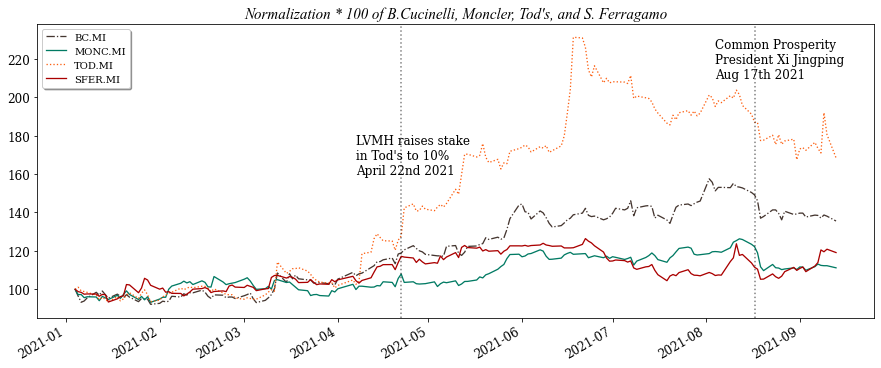

In [147]:
plt.rcParams['font.size'] = '12'
(ita_df['BC.MI'] / ita_df['BC.MI'].iloc[0] * 100).plot(figsize = (15,6),color='#453630',linestyle='-.',linewidth = 1.3)
(ita_df['MONC.MI'] / ita_df['MONC.MI'].iloc[0] * 100).plot(figsize = (15,6),color='#017A63',linewidth = 1.3)
(ita_df['TOD.MI'] / ita_df['TOD.MI'].iloc[0] * 100).plot(figsize = (15,6),color='#FD5E0F',linestyle=':',linewidth = 1.3)
(ita_df['SFER.MI'] / ita_df['SFER.MI'].iloc[0] * 100).plot(figsize = (15,6),color='#AA0000',linewidth = 1.3)

plt.axvline(datetime(2021, 4, 22), color='black',linestyle=':', linewidth=1.5,alpha=0.5)
plt.text(datetime(2021, 4, 7), 160, "LVMH raises stake\nin Tod's to 10%\nApril 22nd 2021",fontsize=12)

plt.axvline(datetime(2021, 8, 17), color='black', linestyle=':', linewidth=1.5,alpha=0.5)
plt.text(datetime(2021, 8, 4), 210, "Common Prosperity\nPresident Xi Jingping\nAug 17th 2021", fontsize=12)

plt.title("Normalization * 100 of B.Cucinelli, Moncler, Tod's, and S. Ferragamo",fontsize=15,
          family='Times New Roman', style='italic')
plt.xlabel("")
plt.legend(loc='upper left',fancybox=True, shadow=True,prop={'size':'small'})
plt.show()

### - The four Italians 

Since the beginning of the year, the Italian fashion house **Ferragamo** didn't grow as much as its competitors from `€15.74` in January 2021 to `€19.02` in September 2021. The story of **LVMH group** that acquired more stakes in **Tod's Group** created a big push for the other Italian shoemaker. **Brunello Cucinelli** with a differential advantage of "Humanistic capitalism" seems to be trusted by investors during hard times.

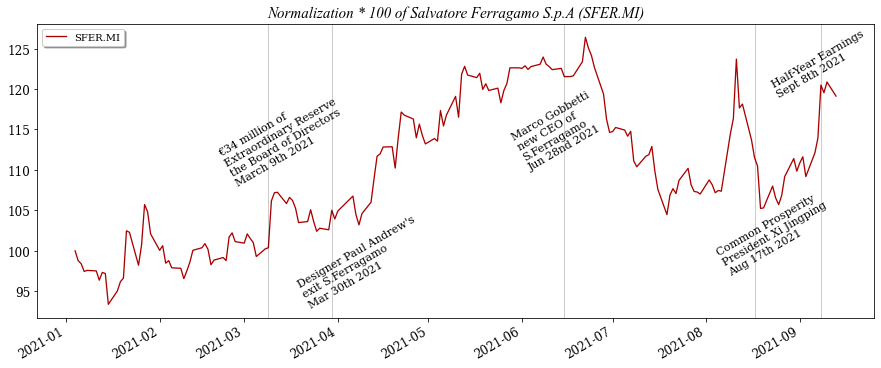

In [148]:
plt.rcParams['font.size'] = '12'
(ita_df['SFER.MI'] / ita_df['SFER.MI'].iloc[0] * 100).plot(figsize = (15,6),color='#AA0000',linewidth = 1.3)

plt.axvline(datetime(2021, 3, 9), color='black', linewidth=1,alpha=0.2)
plt.text(datetime(2021, 2, 20), 108, "€34 million of\nExtraordinary Reserve\nthe Board of Directors\nMarch 9th 2021",
         rotation=30, fontsize=11)
plt.axvline(datetime(2021, 3, 30), color='black', linewidth=1,alpha=0.2)
plt.text(datetime(2021, 3, 18), 93, "Designer Paul Andrew's\nexit S.Ferragamo\nMar 30th 2021",rotation=30, fontsize=11)
plt.axvline(datetime(2021, 6, 15), color='black', linewidth=1,alpha=0.2)
plt.text(datetime(2021, 5, 28), 110, "Marco Gobbetti\nnew CEO of\nS.Ferragamo\nJun 28nd 2021",rotation=30, fontsize=11)
plt.axvline(datetime(2021, 8, 17), color='black', linewidth=1,alpha=0.2)
plt.text(datetime(2021, 8, 4), 97, "Common Prosperity\nPresident Xi Jingping\nAug 17th 2021",rotation=30, fontsize=11)
plt.axvline(datetime(2021, 9, 8), color='black', linewidth=1,alpha=0.2)
plt.text(datetime(2021, 8, 22), 119, "Half-Year Earnings\nSept 8th 2021",rotation=30, fontsize=11)

plt.title('Normalization * 100 of Salvatore Ferragamo S.p.A (SFER.MI)',fontsize=15,family='Times New Roman', style='italic')
plt.xlabel("")
plt.legend(loc='upper left',fancybox=True, shadow=True,prop={'size':'small'})
plt.show()

### - Trends

On a yearly basis, various news affected the trend of the stock price, **Extraordinary Reserve** of **`€34M`**, the appointment of **Marco Gobbetti** from Burberry as new CEO, and the positive results of the half year earnings 2021. The big news of "Common Prosperity" by Chinese President **Xi Jingping** aimed at **“reasonable adjustments to excessive incomes”** didn't affect the price much in the long-term. It came back to normal level. However, the new guidelines on KOL working in Chinese social media platforms might become a hurdle for the growth of Ferragamo.

In [149]:
df_ferragamo = yf.download('SFER.MI',start='2011-07-11',end='2021-09-14', progress=False)['Adj Close']

In [151]:
print(f"SFER MI - Stock Price: {df_ferragamo[0]} on July 07th 2011")
print(f"SFER MI - Stock Price: {df_ferragamo[-1]} on September 13th 2021")

SFER MI - Stock Price: 8.830942153930664 on July 07th 2011
SFER MI - Stock Price: 18.75 on September 13th 2021


In [152]:
log_returns = np.log(1 + df_ferragamo.pct_change()).dropna()
print(f"Historical data:\nSFER MI - Daily rate of returns {str(round(log_returns.mean(),8))}")
ferragamo_returns = log_returns.mean() * 252 #Trading Days
print(f"SFER.MI - Annualized rate of returns {str(round(ferragamo_returns,5)* 100)} %")
ferragamo_std = log_returns.std() * 252 ** 0.5 #Annualized Standard Deviation
print(f"SFER.MI - Annualized standard deviation {str(round(ferragamo_std,6))}\n")

log_returns_2021 = np.log(1 + ita_df['SFER.MI'].pct_change()).dropna()
print(f"As September 2021:\nSFER.MI - Daily rate of returns {str(round(log_returns_2021.mean(),8))}")
ferragamo_returns_2021 = log_returns_2021.mean() * 174 
print(f"SFER.MI - Annualized rate of returns {str(round(ferragamo_returns_2021,3)* 100)} %")
ferragamo_std_2021 = log_returns_2021.std() * 174 ** 0.5 #Annualized Standard Deviation
print(f"SFER.MI - Annualized standard deviation {str(round(ferragamo_std_2021,6))}")

Historical data:
SFER MI - Daily rate of returns 0.00029161
SFER.MI - Annualized rate of returns 7.349 %
SFER.MI - Annualized standard deviation 0.353989

As September 2021:
SFER.MI - Daily rate of returns 0.00098308
SFER.MI - Annualized rate of returns 17.1 %
SFER.MI - Annualized standard deviation 0.246777


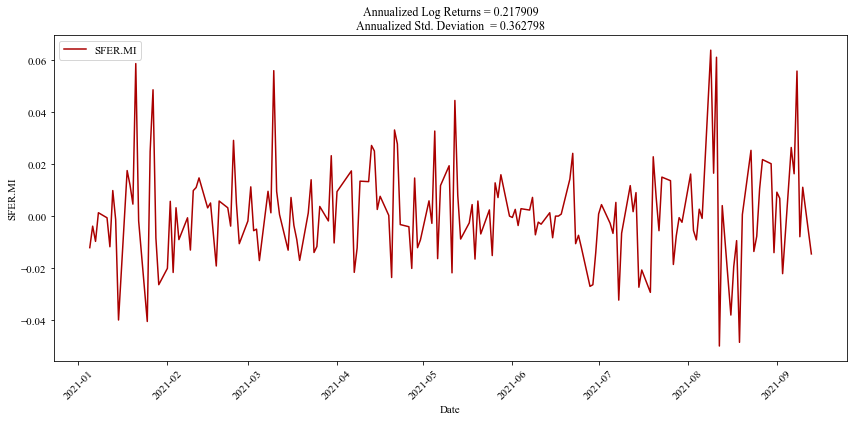

In [153]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = '11'

fig = plt.figure(figsize=(12,6)) 
sns.lineplot(data=log_returns_2021,color='#AA0000')
plt.xticks(rotation=45)
plt.title("Annualized Log Returns = 0.217909\nAnnualized Std. Deviation  = 0.362798", fontsize=12)
plt.legend(loc='upper left', labels=['SFER.MI'])
plt.tight_layout()
plt.show()

In [154]:
print(f"SFER.MI - Quantile with 95% confidence level: {log_returns_2021.quantile(0.05)}")
print(f"SFER.MI - Quantile with 99% confidence level: {log_returns_2021.quantile(0.01)}")

SFER.MI - Quantile with 95% confidence level: -0.02651615990014529
SFER.MI - Quantile with 99% confidence level: -0.04241244435780028


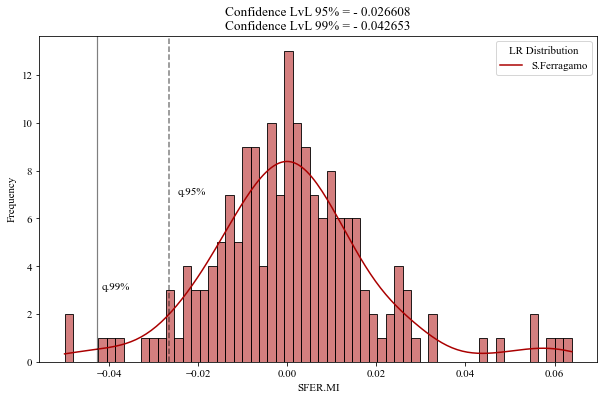

In [155]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = '11'

fig = plt.figure(figsize=(10,6)) 
sns.histplot(log_returns_2021, bins=60,kde=True,color='#AA0000') 

plt.title("Confidence LvL 95% = - 0.026608\nConfidence LvL 99% = - 0.042653")

plt.axvline(-0.026608, color='black', linestyle='--',linewidth = 1.5,alpha=0.5) #Quantile 95%
plt.text(-0.024608, 7,"q.95%", color='black',fontsize=11)

plt.axvline(-0.042653, color='black', linewidth=1.2,alpha=0.5) #Quantile 99%
plt.text(-0.041653, 3,"q.99%", color='black',fontsize=11)

plt.ylabel('Frequency')
plt.legend(title='LR Distribution', loc='upper right', labels=['S.Ferragamo'])
plt.show()

### Stability

Compared to other Italian competitors, **S.Ferragamo** seems to be slightly forgotten by investors. Yet, the stock price of Salvatore Ferragamo didn’t fall like French luxury groups of huge market cap. Portfolios of many brands is offering a protection with scale for the revenues of luxury groups but in times of important crisis, smaller brands are quickly burning cash. And what if a stable group based on one strong heritage brand with a differential advantage like Hermès is the key? 

---

## <div align="center"><b>- 2. Marketing – Why is TikTok a mistake in luxury? </b></div>

Social media platforms became the most powerful tools for fashion and luxury brands in order to reach a new audience. However, platforms are not all created equal from the algorithmic, geographical and cultural standpoint,
By some fear of missing out, or following poor advices of an advertising agency, many luxury brands are falling into the trap of **TikT0k** (ByteDance). Ferragamo specially crafted an advertising campaign for the platform called **“Let’s Dance together”** with pop music, vertical format, and talented contemporary dancers. 

On June 17th 2021, the first video compiled more than `2.7` million views.  Unfortunately, this success is hiding the fact that most of the `99` comments are negative. Since then, the metrics went in a downward spiral and even the TikT0k influencers aren’t solving the problems either. In July 2021, **Tayhage** (`1.6M` followers) or **Walker J Bryant** (`1.5M` followers) received respectively 1326 views/48 likes, and 1377 views/75 likes. After a two months break, the most recent video with **Melissacraft** (`983.9K` followers) achieved 19 likes, 3 comments and 3 shares for a total of 356 views as September 14th, 2021 - 2:00 Paris time.

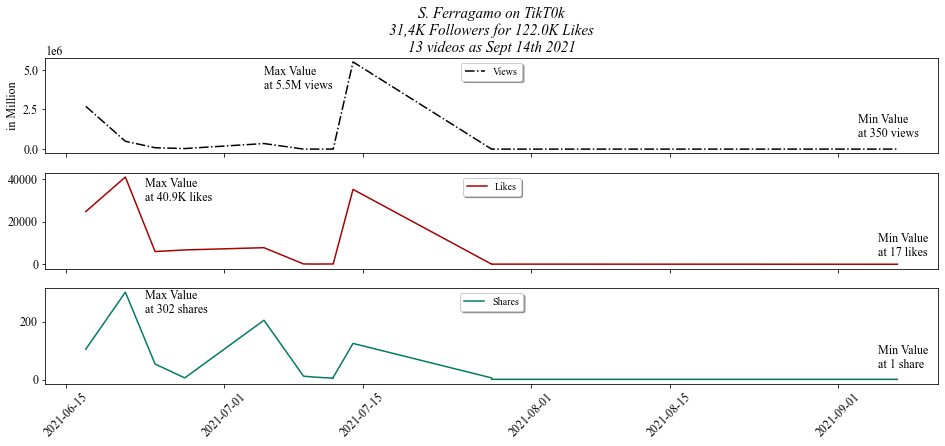

In [165]:
TikT0kSF = pd.read_csv('FerragamoTikT0k2021.csv',sep=";",quotechar='"',index_col='createTime', parse_dates=True)

views = TikT0kSF['playCount']
likes = TikT0kSF['likesCount']
shares = TikT0kSF['shareCount']

plt.rcParams['font.size'] = '12'

fig,(ax1, ax2, ax3) = plt.subplots(3,figsize=(16,6), sharex=True)
ax1.set_title("S. Ferragamo on TikT0k\n31,4K Followers for 122.0K Likes\n13 videos as Sept 14th 2021",
              fontsize=15, family='Times New Roman', style='italic')
ax1.plot(views,color='black',linestyle='-.',label='Views')
ax1.text(datetime(2021, 7, 5), 3800000, 'Max Value\nat 5.5M views', fontsize=12)
ax1.text(datetime(2021, 9, 3), 800000, 'Min Value\nat 350 views', fontsize=12)
ax1.set_ylabel('in Million')
ax1.legend(loc="upper center", ncol=2,fancybox=True, shadow=True, prop={'size':'small'})

ax2.plot(likes,color='#AA0000',label='Likes')
ax2.text(datetime(2021, 6, 23), 29900, 'Max Value\nat 40.9K likes', fontsize=12)
ax2.text(datetime(2021, 9, 5), 4000, 'Min Value\nat 17 likes', fontsize=12)
ax2.legend(loc="upper center", ncol=2,fancybox=True, shadow=True, prop={'size':'small'}) 

ax3.plot(shares,color='#017A63',label='Shares')
ax3.text(datetime(2021, 6, 23), 230, 'Max Value\nat 302 shares', fontsize=12)
ax3.text(datetime(2021, 9, 5), 40, 'Min Value\nat 1 share', fontsize=12)
ax3.legend(loc="upper center", ncol=2,fancybox=True, shadow=True, prop={'size':'small'}) 

plt.xticks(rotation=45)
plt.show()

## TikT0k is a big mistake

The Italian brand is not alone. The majority of luxury brands are having hard times, completely stopped, or smartly didn't try it. The hype of million of views at the beginning are quickly turning sour due to the algorithm. The recommendation engine of TikTok is a hybrid system with content-based and knowledge-based filtering. Users are scrolling an endless loop of videos that create their bespoke environments. The ranking methodology doesn’t reward likes or comments but the coefficient of rewatch, and the completion. 

Therefore on TikT0k, the cute girl/boy teenagers dancing for 10 seconds on a viral song in the kitchen will achieve greater success than the biggest brands with million in marketing budget.

TikT0k might be great for CPG items with low prices, but it’s a pitfall for ROAS concerning luxury brands with higher price points. 

## Digital strategy

Overall metrics of Ferragamo are pretty good with **`1.8M`** followers on Facebook, **`5.7M`** followers on Instagram, **`500K`** followers on Weibo, **`214K`** followers on Line, **`270K`** followers on LinkedIn, or **`930K`** on Pinterest as August 31st 2021. 

The advertising campaign with young actor **Hero Fiennes** in 2019/20 was a success on Instagram, but not leveraged enough. The most recent collaboration with Chinese actor and singer **Alan Yu** (于朦胧) didn’t achieved the same success on Weibo. The Italian brand is having difficult times on LittleRedBook, and is nowhere to be found on KakaoTalk in South-Korea, which is a growing market for the brand. 

Ferragamo is still applying conservative storytelling of OOH from the West when luxury brands are embracing a localized brand strategy to reach a younger audience in the East. On the strategy side, European luxury brands are often thinking in a euro-centric way. At the same time will give too much freedom to external agencies in Asia in hope for better growth rate. There is a big opportunity to improve their digital assets, content, and strategy in the near future. 

---

## <div align="center"><b>- 3. Option pricing – Black Scholes option pricing and the Greeks </b></div>
    
Options are a type of derivative product that allow investors to **speculate**, **hedge**, **arbitrage** on an financial asset. 

- A **"call option"** gives the holder the right to **buy** an asset by a certain date for a certain price.

- A **"put option"** gives the holder the right to **sell** an asset by a certain date for a certain price. 

- The date specified in the contract is known as the **"maturity date"**.

- The price specified in the contract is known as the **"strike price"**.

Most common options are American and European options. Other complex options are Bermudian, Asian, Exotic and hybrid options. 

- **"American options"** can be exercised at any time up to the maturity date. 

- **"European options"** can be exercised only on the maturity date.

## Black-Scholes formula for an European option:

I will use the **Black Scholes model analytic pricing** to calculate an **European call option (vanilla)**. I will not do a Monte Carlo simulation, create pay-offs functions, calculated impliated volatility or even machine learning methods since it’s one dimension. But I will do a breakdown of the analytical form, with math formulas, and greeks in step-by-step to have a clear understanding. 
European options can only be exercised at expiration, without taking into account dividend yield, under the assumptions that markets are efficients and the underlying stock is normally distributed. 

In our learning case study, the current stock price SFER.MI closed at **€18.75** on 13th September 13th 2021 and I will speculate that the stock price could reach **€29.00** at the beginning of **April 1st 2022**.

Factors for an European call option:
- The current stock price, **S**
- The strike price, **K** 
- The time to maturity, **T**
- The volatility of the stock price, **σ** (or sigma)
- The risk-free interest rate, **r**


- **Call** Option Pricing: $$ C (S,t) = SN(d1) - Ke^{rT} N(d2) $$

- **Put** Option Pricing: $$ {P} {(S,t)} = {- N(-d1)S }+ {N(-d2) Ke^{-rT}} $$

Where,
$$ {d1 = \frac{ln(\frac{S}{K}) + (r + \frac{\sigma^2}{2})T }{\sigma \sqrt{T}} }$$


and,
$$ {d2 = \frac{ln(\frac{S}{K}) + (r - \frac{\sigma^2}{2})T }{\sigma \sqrt{T}} }$$
or more simply

$$ {d2 = d1 - \sigma \sqrt T} $$

In [173]:
def d1(S,K,T,r,sigma):
    d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / ( sigma * np.sqrt(T))
    return d1

def d2(S,K,T,r,sigma):
    d2 = (d1(S,K,T,r,sigma) - sigma * np.sqrt(T))
    return d2

def BlackScholes_Call(S,K,T,r,sigma):
    bsc = (S * norm.cdf(d1(S,K,T,r,sigma)) - K * exp(-r * T) * norm.cdf(d2(S,K,T,r,sigma)))
    return bsc

def BlackScholes_Put(S,K,T,r,sigma):
    bsp = (K*exp(-r*T)-S + BlackScholes_Call(S,K,T,r,sigma))
    return bsp

S= 18.75 #Current Stock price
K= 29.00 #Strike price
T= 0.547945 #Maturity 0.547945  #200 days divided by 365 - April 1st 2022
r= 0.003 #Interest rate Euribor 6 months? at -0,53
sigma= 0.24 #Volatility 24%

print(f'Black-Scholes Call Option:  {BlackScholes_Call(S,K,T,r,sigma)}')
print(f'Black-Scholes Put Option:  {BlackScholes_Put(S,K,T,r,sigma)}')

Black-Scholes Call Option:  0.00977717571170722
Black-Scholes Put Option:  10.212145121056906


## Greeks - Sensitivity of Options

### $\Delta$  - Delta
- **Delta** measures how much an option's price is expected to change per `€1` change in the price of the underlying security (or index)

Where N is the cumulative distribution function of the standard normal distribution:

$$  \Delta = \frac{\partial C}{\partial S} =  { N(d1)}$$

In [174]:
def delta_call(S,K,T,r,sigma):
    delta_c = norm.cdf(d1(S,K,T,r,sigma))
    return delta_c

### $\Gamma$ - Gamma
- **Gamma** measures the rate of change in an option’s Delta per `€1` change in the price of the underlying stock

$$  \Gamma = \frac{\partial^2 C}{\partial S^2}  = \frac{N(d1)}{ S \sigma \sqrt{T - t}} $$

In [175]:
def gamma_call(S,K,T,r,sigma):
    gamma_c = (norm.pdf(d1(S,K,T,r,sigma))/(S*sigma*sqrt(T)))
    return gamma_c

### $\Theta$ - Theta 
- **Theta** measures the time decay of an option

$$  \Theta = \frac{\partial C}{\partial t}   = - \frac{S N'(d1)\sigma}{ 2 \sqrt{T}} - r Ke ^{(rT)} N(d2) $$


In [176]:
def theta_call(S,K,T,r,sigma):
    theta_c = (-0.5 * S * norm.pdf(d1(S,K,T,r,sigma)) * sigma / sqrt(T) - r * K * exp(-r*T) * norm.cdf(d2(S,K,T,r,sigma)))/ 365
    return theta_c

### $\nu$ - Vega 
- **Vega** measures the rate of change in an option’s price per 1% change in the implied volatility of the underlying stock.

$$ \nu = \dfrac{\partial C}{\partial \sigma} = {SN'(d1)\sqrt{ T - t}} $$

In [177]:
def vega_call(S,K,T,r,sigma):
    vega_c = (0.01 * (S * norm.pdf(d1(S,K,T,r,sigma)) * sqrt(T)))
    return vega_c

### $\rho$ - Rho 
- **Rho** measures the expected change in an option’s price per one percentage point change in interest rates.

$$\rho = \dfrac{\partial C}{\partial r} = K(T - t)e^{-r (T-t)} N(d2) $$

In [178]:
def rho_call(S,K,T,r,sigma):
    rho_c = (0.01* (K*T*exp(-r*T) * norm.cdf(d2(S,K,T,r,sigma))))
    return rho_c

In [179]:
print("\nBlack-Scholes Option Pricing:")
print(f'Call Option: {BlackScholes_Call(S,K,T,r,sigma)}')
print(f'Put Option:  {BlackScholes_Put(S,K,T,r,sigma)}\n')

print("The Greeks:")
print(f"Call Option - Delta Price:  {delta_call(S,K,T,r,sigma)} -> € / Δ Spot")
print(f"Call Option - Gamma Price:  {gamma_call(S,K,T,r,sigma)} -> Δ Delta / Δ Spot")
print(f"Call Option - Theta Price: {theta_call(S,K,T,r,sigma)} -> € / Δ Time")
print(f"Call Option - Vega Price:   {vega_call(S,K,T,r,sigma)} -> € / Δ Volatility")
print(f"Call Option - Rho Price:    {rho_call(S,K,T,r,sigma)} -> € / Δ Risk-free rate")


Black-Scholes Option Pricing:
Call Option: 0.00977717571170722
Put Option:  10.212145121056906

The Greeks:
Call Option - Delta Price:  0.009219671625239987 -> € / Δ Spot
Call Option - Gamma Price:  0.007452647945613806 -> Δ Delta / Δ Spot
Call Option - Theta Price: -0.00020807489164691615 -> € / Δ Time
Call Option - Vega Price:   0.0034455722444094567 -> € / Δ Volatility
Call Option - Rho Price:    0.0008936526361762592 -> € / Δ Risk-free rate


Derivatives are offering extra leverage, and liquidity for investors. Yet, when the potential profit is, theoretically, unlimited, so the potential loss on a short call is theoretically unlimited.

On the Greeks, we can see that the Theta is negative and will become bigger due to the time decay. At 0.009 for a call option, we could basically speculate on the future mouvements. But since we calculated a call, put options, and the greeks, we could diminish the directional risk of a position. We could reduce the risk with hedging strategies involving puts and calls, or more sophisticated strategies such as delta, gamma or vega hedging. I believe that the delta hedging for a long position in a European call option would be to maintain a short position of N(d1) equivalent amount of shares.

--- 

## <div align="center"><b>- 4. Conclusion </b></div>

The financial market is already seeing a real potential which is pushing the company’s stock price to around `€19.04` after the latest financial report on Friday 11th 2021. My option pricing at `€29.00` for April 1st 2022 can be achieved with a clear strategy from Ferragamo. 

The appointment of a new artistic director will be just one of the keys for the growth of Ferragamo. The recent popular strategies relying on influencers, provocative advertising campaigns, collaborations with multiple designers or a blackout on social media might not be the best fit.

Salvatore Ferragamo has the potential to shine on the global scale while respecting its Italian heritage with a counter-intuitive brand positioning, a sharp digital roadmap, and a more technical approach in marketing.


Thank you for reading!

Please feel free to contact me if you have any questions.

**Akim Mousterou**

---

**Disclaimer:** *This is for research purposes only, I have already delete the TikT0k dataset. I am not working for Salvatore Ferragamo. I don't own shares of SFER.MI. None of the content published on this notebook constitutes a recommendation that any particular security, portfolio of securities, transaction, or investment strategy is suitable for any specific person. None of the information providers or their affiliates will advise you personally concerning the nature, potential, value, or suitability of any particular security, portfolio of securities, transaction, investment strategy, or other matter.*